[0.00000000e+00 2.50208507e+01 5.00417014e+01 ... 2.99499583e+04
 2.99749791e+04 3.00000000e+04]
3400
200
1200


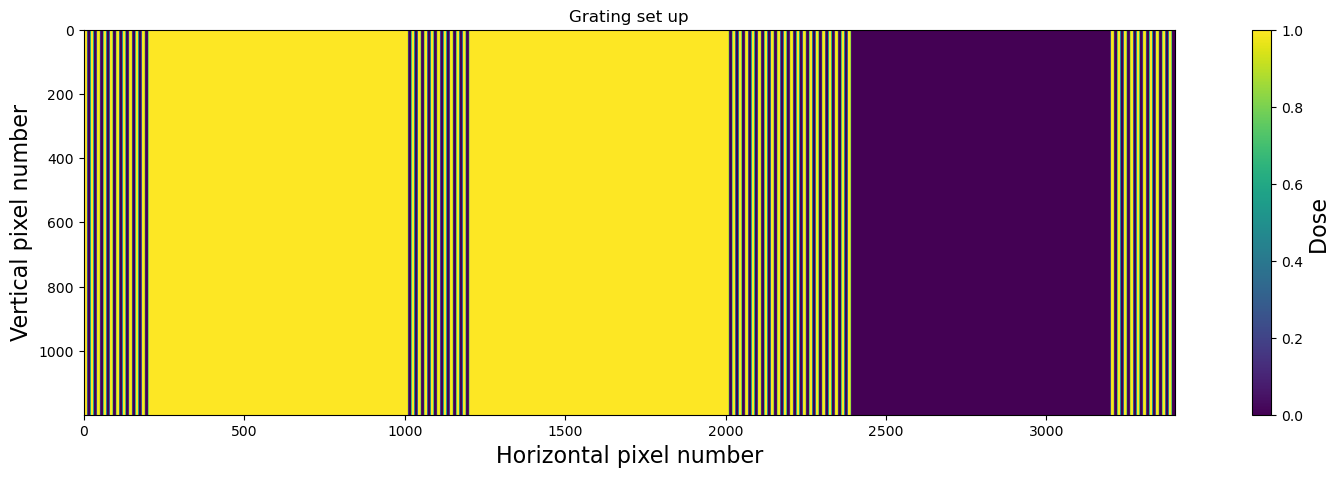

In [2]:
import numpy as np
import matplotlib.pyplot as plt



eta = 0.5 #@50 keV on si
sigma_b = 6 #@50 keV on si

RT = 1 # Resist Threshold 
#ED =  #Effective Dose

#PB = (eta/sigma_b**2) * np.exp(-np.abs(r**2)/sigma_b**2)

min_pix_size = int(25) #nanometers 
width = int(85000) #nanometers 
height = int(30000) #nanometers 
pix_width = int(width/min_pix_size)
pix_height = int(height/min_pix_size)

y = np.linspace(0,int(width),int(pix_width)) #Radius
x = np.linspace(0,int(height),int(pix_height))
print(x)
print(pix_width)

dose_map = np.zeros((pix_height,pix_width))
grating_width = 250
pix_grating_width = int(grating_width/min_pix_size)


left_grating = np.zeros((pix_height, pix_grating_width*20))
print(left_grating.shape[1])
print(left_grating.shape[0])

for i in range(dose_map.shape[1]):
    for j in range(dose_map.shape[0]):
        if i < 200:
            if i%20 < 10:
                dose_map[j,i] = 1
                
        if 199 < i < 1000:
            dose_map[j,i] = 1

        if 999 < i < 1200:
            if i%20 < 10:
                dose_map[j,i] = 1

        if 1199 < i < 2000:
            dose_map[j,i] = 1

        if 1999 < i < 2400:
            if i%20 < 10:
                dose_map[j,i] = 1

        if 2399 < i < 3200:
            dose_map[j,i] = 0

        if 3199 < i < 3400:
            if i%20 < 10:
                dose_map[j,i] = 1
    

plt.figure(figsize=(20, 5))
plt.imshow(dose_map, cmap='viridis')
cbar = plt.colorbar()
cbar.set_label('Dose ', fontsize=16)
#plt.xlim(0,100)
#plt.ylim(0,100)
plt.xlabel('Horizontal pixel number', fontsize=16)
plt.ylabel('Vertical pixel number', fontsize=16)
plt.title('Grating set up')
plt.show()

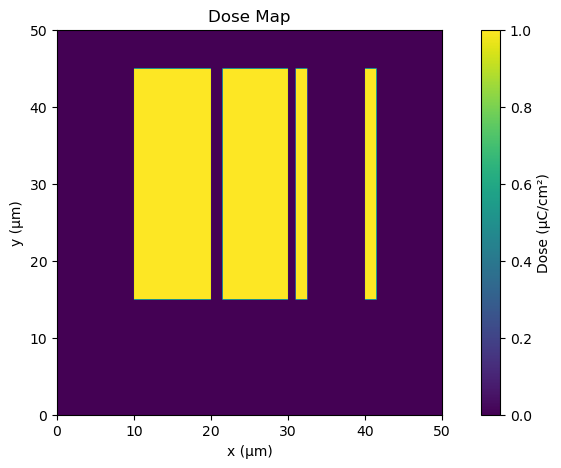

In [59]:
import numpy as np
import matplotlib.pyplot as plt


d_0 = 1.0

# Step 1: Define the grid dimensions
grid_size = (500, 500)  # Pixels
dose_map = np.zeros(grid_size)  # Initialize the dose map with zeros

# Conversion factor: microns to pixels
x_extent = 50 # Micron extent in the x-direction
pixel_per_micron = grid_size[1] / x_extent  # Pixels per micron

# Helper function to convert microns to pixel indices
def microns_to_pixels(start_micron, end_micron):
    start_pixel = int(start_micron * pixel_per_micron)
    end_pixel = int(end_micron * pixel_per_micron)
    return start_pixel, end_pixel

# Step 2: Define regions with different dose values
# Box 1: x 10–20 µm
x_start, x_end = microns_to_pixels(10, 20)
dose_map[50:350, x_start:x_end] = d_0  # Assign dose value 1.8

# Box 2: x 21.5–30 µm
x_start, x_end = microns_to_pixels(21.5, 30)
dose_map[50:350, x_start:x_end] = d_0  # Assign dose value 1.8

# Box 3 (Thin): x 31.5–32.5 µm
x_start, x_end = microns_to_pixels(31, 32.5)
dose_map[50:350, x_start:x_end] = d_0  # Assign dose value 1.8

# Box 4 (Thin): x 40–41.5 µm
x_start, x_end = microns_to_pixels(40, 41.5)
dose_map[50:350, x_start:x_end] = d_0  # Assign dose value 1.8

# Step 3: Visualize the dose map
plt.figure(figsize=(10, 5))
plt.imshow(dose_map, cmap='viridis', extent=[0, x_extent, 0, 50])  # Set extent in microns
plt.colorbar(label='Dose (μC/cm²)')
plt.xlabel('x (µm)')
plt.ylabel('y (µm)')
plt.title('Dose Map')
plt.show()


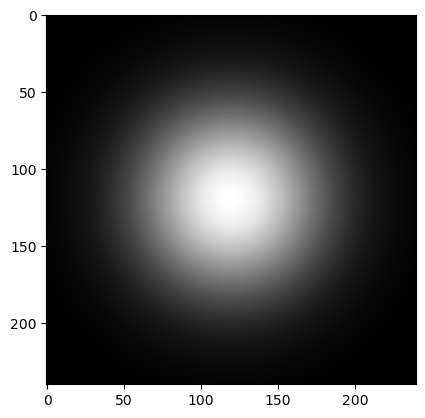

<Figure size 640x480 with 0 Axes>

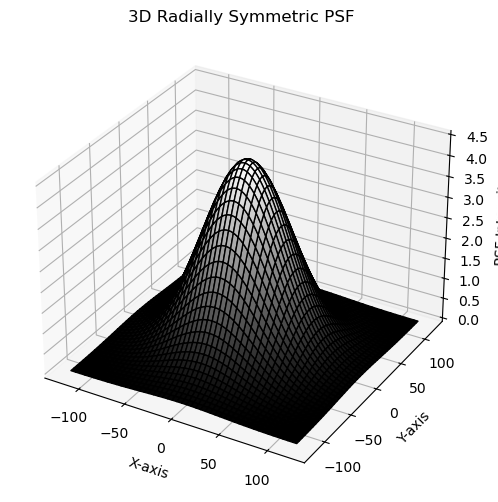

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [61]:
from scipy.ndimage import convolve
from scipy.signal import convolve2d
import numpy as np
import matplotlib.pyplot as plt

# Constants for the PSF
sigma_B = 6  # microns @50 keV on si 
eta = 0.5 #@50 keV on si 

# Grid setup
grid_size = (500, 500)  # Pixels
x_extent = 50  # Micron extent in the x-direction
pixel_per_micron = grid_size[1] / x_extent  # Pixels per micron

# Convert sigma_B to pixels
sigma_B_pixels = sigma_B * pixel_per_micron

# Define the point spread function (PSF)
def point_spread_function(r, sigma_B_pixels, eta):
    return (eta / (sigma_B_pixels**2)) * np.exp(-(r / sigma_B_pixels)**2)

# Create a PSF kernel
kernel_size = int(4 * sigma_B_pixels)  # Ensure the kernel is large enough
x = np.linspace(-kernel_size / 2, kernel_size / 2, kernel_size)
y = np.linspace(-kernel_size / 2, kernel_size / 2, kernel_size)
X, Y = np.meshgrid(x, y)

r = np.sqrt(X**2 + Y**2)
PSF_kernel = point_spread_function(r, sigma_B_pixels, eta)

# Normalize the kernel so it sums to 1

PSF_kernel /= PSF_kernel.sum()
PSF_kernel = PSF_kernel * eta

plt.imshow(PSF_kernel,cmap = 'gray')
plt.show()
plt.figure()

# Plot the 3D surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, PSF_kernel, cmap='grey',edgecolor='black')

# Customize the plot
ax.set_title('3D Radially Symmetric PSF')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('PSF Intensity')
plt.show()
plt.figure()



<>:49: SyntaxWarning: invalid escape sequence '\m'
<>:49: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sm/89rv8yy96bscxt0tyvc5xpjm0000gn/T/ipykernel_22958/2778317670.py:49: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Position $(\mu$m)')


(500, 500)
(240, 240)


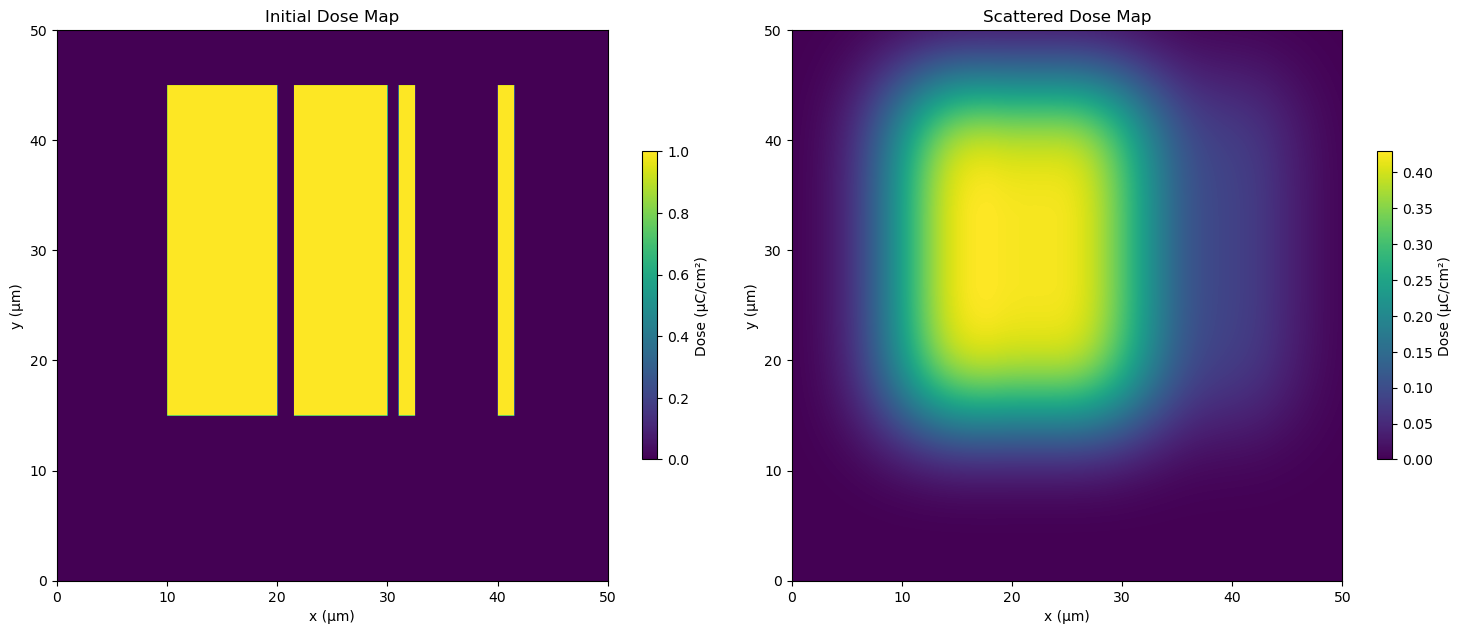

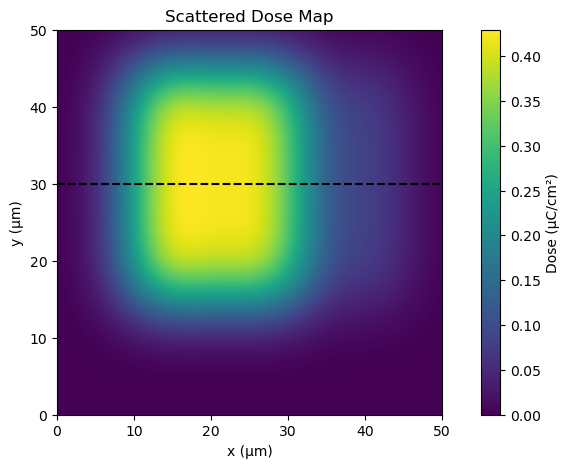

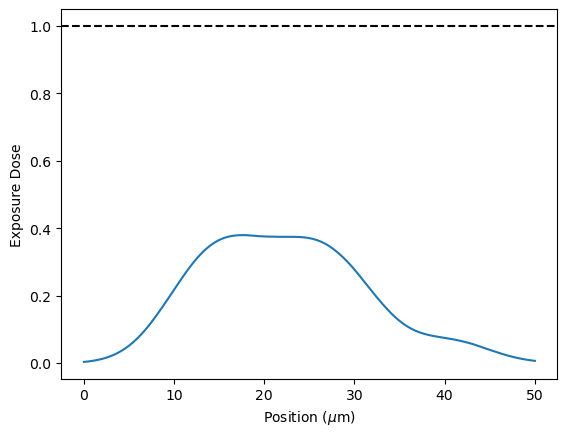

In [34]:
from scipy.signal import convolve2d

dose_with_scattering = convolve2d(dose_map, PSF_kernel, mode='same')

print(dose_map.shape)
print(PSF_kernel.shape)


# Create a figure with 3 subplots arranged in a row
fig, axes = plt.subplots(1, 2, figsize=(15, 8) ) # 1 row, 2 columns

# Plot the first figure
axes[0].imshow(dose_map, cmap='viridis', extent=[0, x_extent, 0, 50])
axes[0].set_title('Initial Dose Map')
axes[0].set_xlabel('x (µm)')
axes[0].set_ylabel('y (µm)')
cbar1 = fig.colorbar(axes[0].images[0], ax=axes[0], orientation='vertical', shrink=0.4)
cbar1.set_label('Dose (μC/cm²)')

# Plot the second figure
axes[1].imshow(dose_with_scattering, cmap='viridis', extent=[0, x_extent, 0, 50])
axes[1].set_title('Scattered Dose Map')
axes[1].set_xlabel('x (µm)')
axes[1].set_ylabel('y (µm)')
cbar2 = fig.colorbar(axes[1].images[0], ax=axes[1], orientation='vertical', shrink=0.4)
cbar2.set_label('Dose (μC/cm²)')


# Adjust layout for better spacing
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
plt.imshow(dose_with_scattering, cmap='viridis', extent=[0, x_extent, 0, 50])
plt.colorbar(label='Dose (μC/cm²)')
plt.axhline(y=30, color='black', linestyle='--', linewidth=1.5)  # Black dotted line at y = 15
plt.xlabel('x (µm)')
plt.ylabel('y (µm)')
plt.title('Scattered Dose Map')
plt.show()


dose_slice = dose_with_scattering[300,:]
x_1d = np.linspace(0, 50, len(dose_slice))

plt.plot(x_1d,dose_slice)
plt.axhline(y = 1.0, color = 'black', linestyle = '--') 
plt.xlabel('Position $(\mu$m)')
plt.ylabel('Exposure Dose')
plt.savefig('1D Dose.png')

In [63]:

mask = np.where(dose_map == 0)


iterations = 5
for j in range(iterations):

    #Determining the scattered dose 
    Convolution = convolve2d(dose_map, PSF_kernel, mode='same')
    
    #Correcting the dose using formula from Watson paper 
    dose_map = 2 * (d_0 - Convolution)
    
    dose_map[mask] = 0
    
    print(j)


0
1
2
3
4


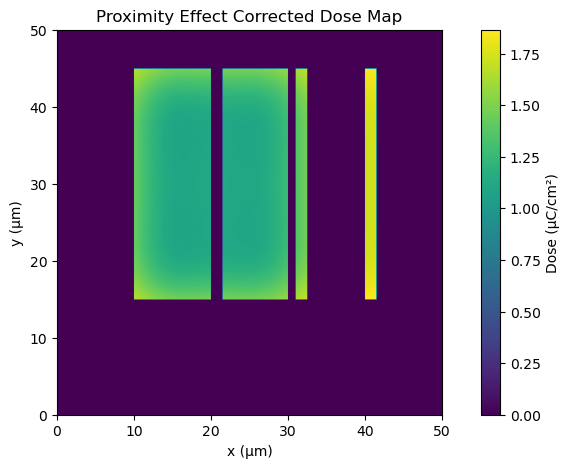

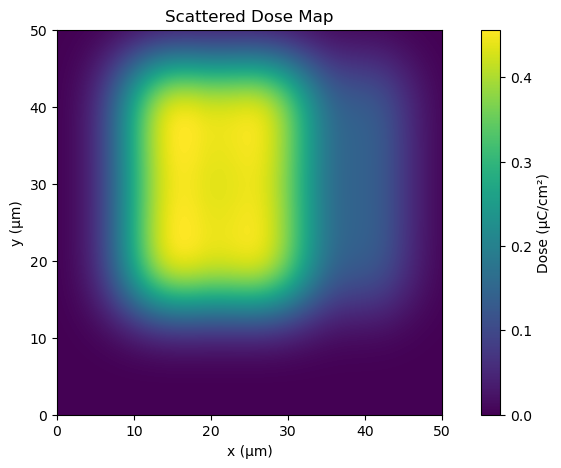

In [65]:
Scattered_dose = Convolution

plt.figure(figsize=(10, 5))
plt.imshow(dose_map, cmap='viridis', extent=[0, x_extent, 0, 50])
plt.colorbar(label='Dose (μC/cm²)')
plt.xlabel('x (µm)')
plt.ylabel('y (µm)')
plt.title('Proximity Effect Corrected Dose Map')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(Scattered_dose, cmap='viridis', extent=[0, x_extent, 0, 50])
plt.colorbar(label='Dose (μC/cm²)')
plt.xlabel('x (µm)')
plt.ylabel('y (µm)')
plt.title('Scattered Dose Map')
plt.show()

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sm/89rv8yy96bscxt0tyvc5xpjm0000gn/T/ipykernel_22958/1797377213.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Position $(\mu$m)')


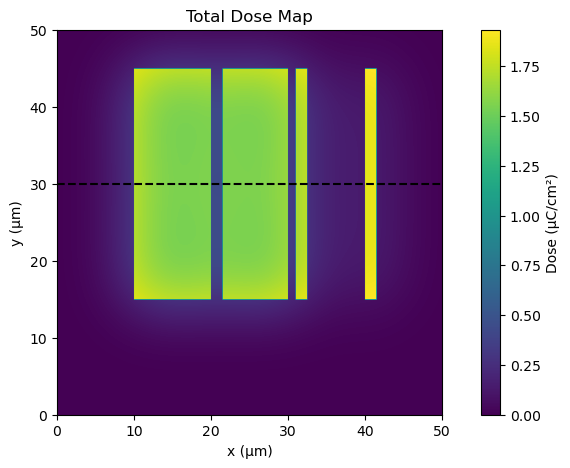

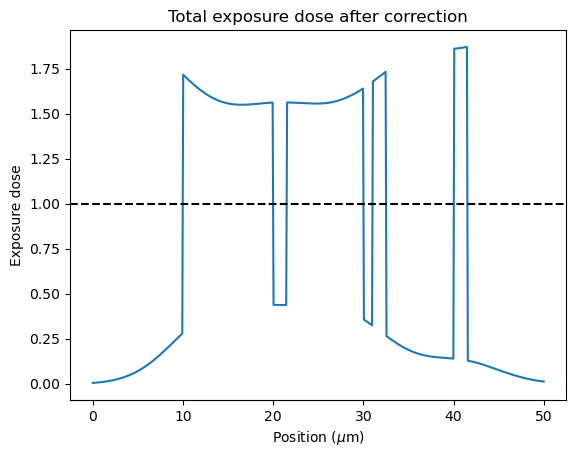

In [67]:
Total_dose = dose_map + Scattered_dose

a = 200
Total_dose_slice = Total_dose[a,:]
x_1d = np.linspace(0, 50, len(dose_slice))

plt.figure(figsize=(10, 5))
plt.imshow(Total_dose, cmap='viridis', extent=[0, x_extent, 0, 50])
plt.axhline(y= 30, color='black', linestyle='--', linewidth=1.5)
plt.colorbar(label='Dose (μC/cm²)')
plt.xlabel('x (µm)')
plt.ylabel('y (µm)')
plt.title('Total Dose Map')
plt.show()


plt.plot(x_1d,Total_dose_slice)
plt.axhline(y = d_0, color = 'black', linestyle = '--') 
plt.xlabel('Position $(\mu$m)')
plt.ylabel('Exposure dose')
plt.title('Total exposure dose after correction')
plt.savefig('1D Dose.png')

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sm/89rv8yy96bscxt0tyvc5xpjm0000gn/T/ipykernel_22958/2685359839.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Position $(\mu$m)')


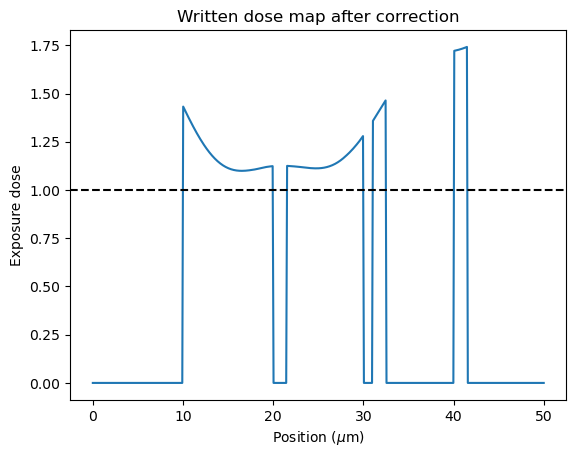

In [71]:
written_dose_slice = dose_map[a,:]

plt.plot(x_1d,written_dose_slice)
plt.axhline(y = d_0, color = 'black', linestyle = '--') 
plt.xlabel('Position $(\mu$m)')
plt.ylabel('Exposure dose')
plt.title('Written dose map after correction')
plt.savefig('1D Dose.png')